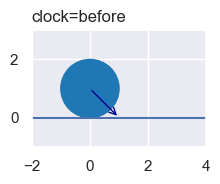

In [1]:
from perfect_physics import Circle, Wall, plot

a = Circle(x=0, y=1, r=1, vx=1, vy=-1, m=1)
w = Wall(x0=-1, y0=0, x1=1,y1=0)
plot(circle_list=[a], wall_list=[w], clock="before", xlim=(-2, 4), ylim=(-1, 3), figsize=(5, 2), font_scale=1)

pass  # avoid showing the plot twice

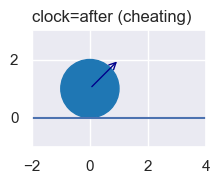

In [2]:
from perfect_physics import Circle, Wall, plot

a = Circle(x=0, y=1, r=1, vx=1, vy=1, m=1)
w = Wall(x0=-1, y0=0, x1=1,y1=0)
plot(circle_list=[a], wall_list=[w], clock="after (cheating)", xlim=(-2, 4), ylim=(-1, 3), figsize=(5, 2), font_scale=1)

pass  # avoid showing the plot twice

a.vx=1, a.vy=-1, b.vx=0, b.vy=0
a.vx=1, a.vy=999/1001, b.vx=0, b.vy=-2/1001


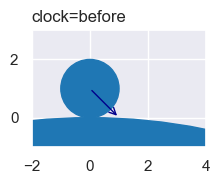

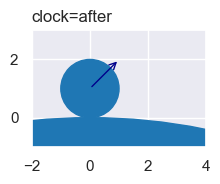

In [5]:
from sympy import sqrt, oo
from perfect_physics import Circle, plot, load

a = Circle(x=0, y=1, r=1, vx=1, vy=-1, m=1)
b = Circle(x=0, y=-20, r=20, vx=0, vy=0, m=1000)
print(f"{a.vx=}, {a.vy=}, {b.vx=}, {b.vy=}")
plot(circle_list=[a,b], clock="before", xlim=(-2, 4), ylim=(-1, 3), figsize=(5, 2), font_scale=1)


cc_velocity_solution = load("cc_velocity_solution.sympy")
a.vx, a.vy, b.vx, b.vy  = cc_velocity_solution.subs([("a_x", a.x), ("a_y", a.y), ("a_r", a.r), ("a_vx", a.vx), ("a_vy", a.vy),("a_m",a.m),
                            ("b_x", b.x), ("b_y", b.y), ("b_r", b.r), ("b_vx", b.vx), ("b_vy", b.vy),("b_m",b.m)])
print(f"{a.vx=}, {a.vy=}, {b.vx=}, {b.vy=}")
plot(circle_list=[a,b], clock="after", xlim=(-2, 4), ylim=(-1, 3), figsize=(5, 2), font_scale=1)

pass

In [9]:
from sympy import sqrt, oo
from perfect_physics import Circle, plot, load

a = Circle(x=0, y=1, r=1, vx=1, vy=-1, m=1)
b = Circle(x=0, y=-20, r=oo, vx=0, vy=0, m=oo)
print(f"{a.vx=}, {a.vy=}, {b.vx=}, {b.vy=}")
# plot(circle_list=[a,b], clock="before", xlim=(-2, 4), ylim=(-1, 3), figsize=(5, 2), font_scale=1)


cc_velocity_solution = load("cc_velocity_solution.sympy")
a.vx, a.vy, b.vx, b.vy  = cc_velocity_solution.subs([("a_x", a.x), ("a_y", a.y), ("a_r", a.r), ("a_vx", a.vx), ("a_vy", a.vy),("a_m",a.m),
                            ("b_x", b.x), ("b_y", b.y), ("b_r", b.r), ("b_vx", b.vx), ("b_vy", b.vy),("b_m",b.m)])
print(f"{a.vx=}, {a.vy=}, {b.vx=}, {b.vy=}")
# plot(circle_list=[a,b], clock="after", xlim=(-2, 4), ylim=(-1, 3), figsize=(5, 2), font_scale=1)
pass

a.vx=1, a.vy=-1, b.vx=0, b.vy=0
a.vx=nan, a.vy=nan, b.vx=0, b.vy=0


In [10]:
from sympy import symbols, Eq, sqrt
a_x, a_y, a_vx, a_vy, a_r, a_m, ahat_vx, ahat_vy = symbols("a_x, a_y, a_vx, a_vy, a_r, a_m, ahat_vx, ahat_vy")
w_x0, w_y0, w_x1, w_y1, w_m, what_vx, what_vy = symbols("w_x0, w_y0, w_x1, w_y1, w_m, what_vx, what_vy")
energy_before = a_m * (a_vx**2 + a_vy**2) / 2 + w_m * 0
energy_after = a_m * (ahat_vx**2 + ahat_vy**2) / 2 + w_m * (what_vx**2 + what_vy**2) / 2
eq1 = Eq(energy_before, energy_after)
eq2 = Eq(a_m * a_vx + w_m * 0, a_m * ahat_vx + w_m * what_vx)
eq3 = Eq(a_m * a_vy + w_m * 0, a_m * ahat_vy + w_m * what_vy)
d = sqrt((w_x1-w_x0)**2 + (w_y1-w_y0)**2)
ux = (w_x1-w_x0)/d
uy = (w_y1-w_y0)/d
eq4 = Eq(a_vx * ux + a_vy * uy, (ahat_vx-what_vx) * ux + (ahat_vy-what_vy) * uy)
eq4


Eq(a_vx*(-w_x0 + w_x1)/sqrt((-w_x0 + w_x1)**2 + (-w_y0 + w_y1)**2) + a_vy*(-w_y0 + w_y1)/sqrt((-w_x0 + w_x1)**2 + (-w_y0 + w_y1)**2), (ahat_vx - what_vx)*(-w_x0 + w_x1)/sqrt((-w_x0 + w_x1)**2 + (-w_y0 + w_y1)**2) + (ahat_vy - what_vy)*(-w_y0 + w_y1)/sqrt((-w_x0 + w_x1)**2 + (-w_y0 + w_y1)**2))

In [11]:
from sympy import nonlinsolve, limit, oo, Tuple
from perfect_physics import save
no_hit, cw_velocity_solution = nonlinsolve(
    [eq1, eq2, eq3, eq4], ahat_vx, ahat_vy, what_vx, what_vy
)
a_vx_limit, a_vy_limit, w_vx_limit, w_vy_limit = [
    limit(velocity, w_m, oo) for velocity in cw_velocity_solution
]
assert w_vx_limit == 0 and w_vy_limit == 0
cw_velocity_limits = Tuple(a_vx_limit, a_vy_limit)
save(cw_velocity_limits, "cw_velocity_limits.sympy")
cw_velocity_limits

((a_vx*w_x0**2 - 2*a_vx*w_x0*w_x1 + a_vx*w_x1**2 - a_vx*w_y0**2 + 2*a_vx*w_y0*w_y1 - a_vx*w_y1**2 + 2*a_vy*w_x0*w_y0 - 2*a_vy*w_x0*w_y1 - 2*a_vy*w_x1*w_y0 + 2*a_vy*w_x1*w_y1)/(w_x0**2 - 2*w_x0*w_x1 + w_x1**2 + w_y0**2 - 2*w_y0*w_y1 + w_y1**2), (2*a_vx*w_x0*w_y0 - 2*a_vx*w_x0*w_y1 - 2*a_vx*w_x1*w_y0 + 2*a_vx*w_x1*w_y1 - a_vy*w_x0**2 + 2*a_vy*w_x0*w_x1 - a_vy*w_x1**2 + a_vy*w_y0**2 - 2*a_vy*w_y0*w_y1 + a_vy*w_y1**2)/(w_x0**2 - 2*w_x0*w_x1 + w_x1**2 + w_y0**2 - 2*w_y0*w_y1 + w_y1**2))

a.vx=1, a.vy=-1
a.vx=1, a.vy=1


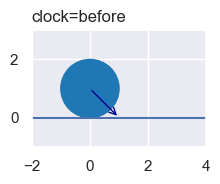

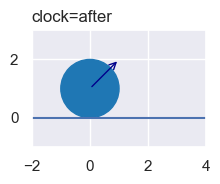

In [14]:
from perfect_physics import Circle, Wall, plot, load

a = Circle(x=0, y=1, r=1, vx=1, vy=-1, m=1)
w = Wall(x0=-1, y0=0, x1=1,y1=0)
print(f"{a.vx=}, {a.vy=}")
plot(circle_list=[a], wall_list=[w], clock="before", xlim=(-2, 4), ylim=(-1, 3), figsize=(5, 2), font_scale=1)


cw_velocity_limits = load("cw_velocity_limits.sympy")
a.vx, a.vy  = cw_velocity_limits.subs([("a_x", a.x), ("a_y", a.y), ("a_r", a.r), ("a_vx", a.vx), ("a_vy", a.vy),("a_m",a.m),
                            ("w_x0", w.x0), ("w_y0", w.y0), ("w_x1", w.x1), ("w_y1", w.y1)])
print(f"{a.vx=}, {a.vy=}")
plot(circle_list=[a], wall_list=[w], clock="after", xlim=(-2, 4), ylim=(-1, 3), figsize=(5, 2), font_scale=1)

pass

a.vx=1, a.vy=-1
a.vx=-1, a.vy=1


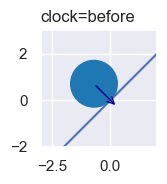

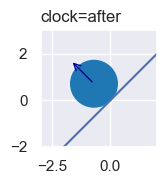

In [15]:
from sympy import sqrt
from perfect_physics import Circle, plot, load

a = Circle(x=-sqrt(2)/2, y=sqrt(2)/2, r=1, vx=1, vy=-1, m=1)
w = Wall(x0=-1, y0=-1, x1=1,y1=1)
print(f"{a.vx=}, {a.vy=}")
plot(circle_list=[a], wall_list=[w], clock="before", xlim=(-3, 2), ylim=(-2, 3), figsize=(2,2), font_scale=1)


cw_velocity_limits = load("cw_velocity_limits.sympy")
a.vx, a.vy  = cw_velocity_limits.subs([("a_x", a.x), ("a_y", a.y), ("a_r", a.r), ("a_vx", a.vx), ("a_vy", a.vy),("a_m",a.m),
                            ("w_x0", w.x0), ("w_y0", w.y0), ("w_x1", w.x1), ("w_y1", w.y1)])
print(f"{a.vx=}, {a.vy=}")
plot(circle_list=[a], wall_list=[w], clock="after", xlim=(-3, 2), ylim=(-2, 3), figsize=(2,2), font_scale=1)

pass